# 1. Install Tesseract

In [23]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract
!wget https://github.com/tesseract-ocr/tessdata_best/raw/main/ind.traineddata -O /usr/share/tesseract-ocr/4.00/tessdata/ind.traineddata

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 261 kB in 1s (175 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading pa

# 2. Import Library

In [24]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
from base64 import b64decode
import pytesseract
from pytesseract import Output
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 3. Image Input

Pilih Metode:
1. Upload Photo
2. Take a Photo
Masukkan pilihan (1/2): 1
Silakan unggah file...


Saving 6.-tampilan-dari-cetak-struk.jpg to 6.-tampilan-dari-cetak-struk (2).jpg


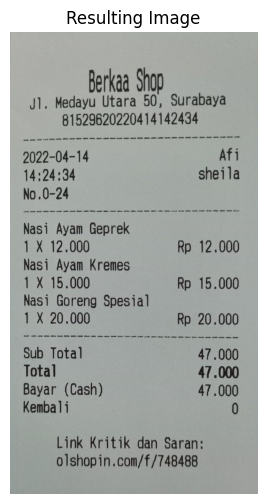

In [25]:
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        div.style.display = 'flex';
        div.style.flexDirection = 'column';
        div.style.alignItems = 'center';
        div.style.marginTop = '20px';

        const video = document.createElement('video');
        video.style.border = '1px solid #ccc';
        video.style.borderRadius = '8px';
        div.appendChild(video);

        const capture = document.createElement('button');
        capture.textContent = 'Take Photo';
        capture.style.marginTop = '10px';
        capture.style.padding = '10px 20px';
        capture.style.backgroundColor = '#007BFF';
        capture.style.color = 'white';
        capture.style.border = 'none';
        capture.style.borderRadius = '5px';
        capture.style.cursor = 'pointer';
        div.appendChild(capture);

        document.body.appendChild(div);

        const stream = await navigator.mediaDevices.getUserMedia({ video: true });
        video.srcObject = stream;
        await video.play();

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);

        stream.getTracks().forEach(track => track.stop());
        div.remove();

        return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

def upload_photo():
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]
    return image_path

print("Pilih Metode:")
print("1. Upload Photo")
print("2. Take a Photo")

choice = input("Masukkan pilihan (1/2): ")
if choice == '1':
    print("Silakan unggah file...")
    image_path = upload_photo()
elif choice == '2':
    print("Silakan ambil foto...")
    image_path = take_photo()
else:
    print("Pilihan tidak valid.")

image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("Resulting Image")
plt.show()


# 4. Preprocessing Image

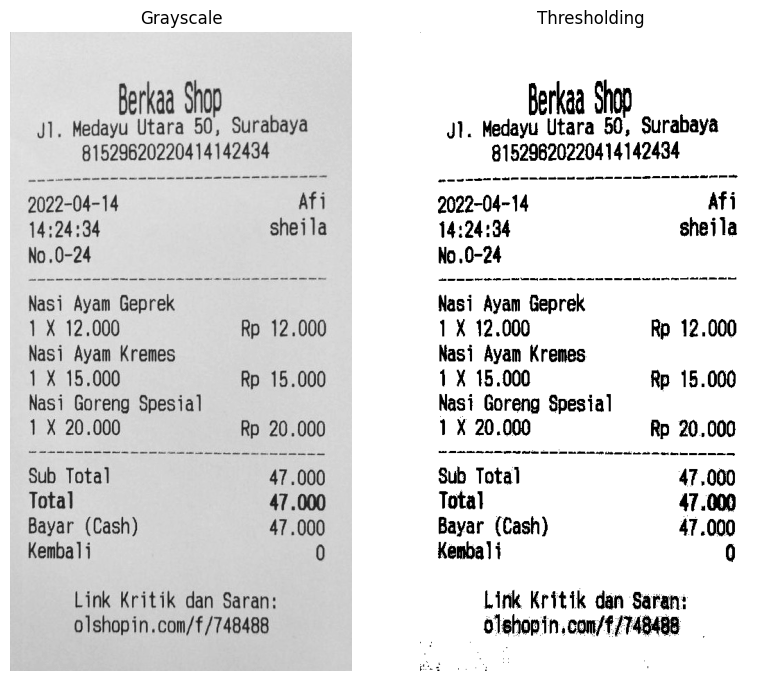

In [26]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)[1]


plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Thresholding")
plt.axis('off')

plt.show()


# 5. OCR Boxes Detection

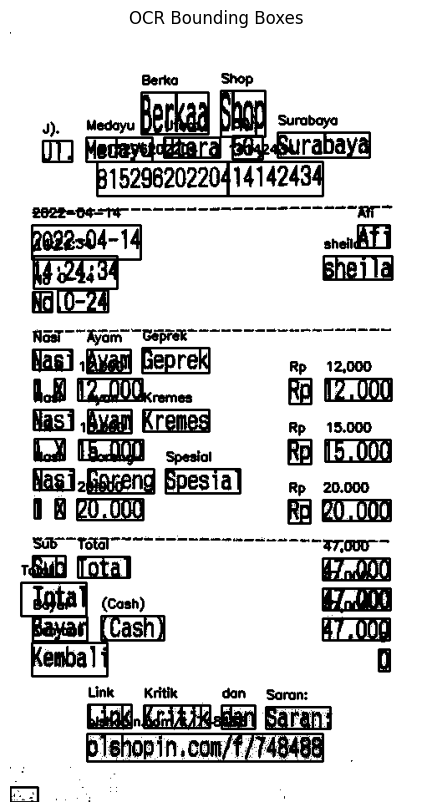

In [27]:
ocr_data = pytesseract.image_to_data(thresh, output_type=Output.DICT)
image_with_boxes = thresh.copy()

for i in range(len(ocr_data['text'])):
    if int(ocr_data['conf'][i]) > 0:
        (x, y, w, h) = (ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i])
        text = ocr_data['text'][i]

        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image_with_boxes, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 10))
plt.imshow(image_with_boxes_rgb)
plt.axis('off')
plt.title("OCR Bounding Boxes")
plt.show()


# 6. Extraction Text

In [28]:
extracted_text = pytesseract.image_to_string(thresh, lang='eng+ind')
print(extracted_text)


Berka Shop

J). Medayu Utara 50, Surabaya

815296202204 14142434
2022-04-14 Afi
14:24:34 sheila
No 0-24
Nasi Ayam Geprek
1 X 12.000 Rp 12,000
Nasi Ayan Kremes
1X 15.000 Rp 15.000
Nasi Goreng Spesial
1 X 20.000 Rp 20.000
Sub Total 47,000
Total 47.000
Bayar (Cash) 47,000
Kembali 0

Link Kritik dan Saran:
Olehopin.comf/f 148488

 



# 7. Getting Information

In [29]:
import re
from datetime import datetime

def extract_receipt_info(text):
    # Ekstrak nama perusahaan (Company)
    company_pattern = r"^\s*(\S[^\n]*)"
    company = re.findall(company_pattern, text)[0] if re.findall(company_pattern, text) else None

    # Ekstrak tanggal dan waktu (Date)
    date_pattern = r"""
    \b                 # Awal kata
    (                  # Grup utama
        (?:\d{4}|\d{2})[-/.]\d{2}[-/.]\d{2}  # Format: yyyy-mm-dd, yyyy/mm/dd, yyyy.mm.dd, atau dd-mm-yyyy
        |              # Atau
        \d{2}[-/.]\d{2}[-/.](?:\d{4}|\d{2})  # Format: dd-mm-yyyy, dd/mm/yyyy, dd.mm.yyyy
    )
    (?:                # Grup opsional untuk waktu
        \s+            # Spasi sebelum waktu
        \d{2}:\d{2}    # Format waktu: HH:MM
    )?                 # Grup opsional selesai
    \b                 # Akhir kata
    """
    date_matches = re.findall(date_pattern, text, re.VERBOSE)
    if date_matches:
        raw_date = date_matches[0]
        try:
            if "-" in raw_date:
                date = datetime.strptime(raw_date, "%Y-%m-%d").strftime("%d-%m-%Y") if len(raw_date.split("-")[0]) == 4 else datetime.strptime(raw_date, "%d-%m-%Y").strftime("%d-%m-%Y")
            elif "/" in raw_date:
                date = datetime.strptime(raw_date, "%Y/%m/%d").strftime("%d-%m-%Y") if len(raw_date.split("/")[0]) == 4 else datetime.strptime(raw_date, "%d/%m/%Y").strftime("%d-%m-%Y")
            elif "." in raw_date:
                date = datetime.strptime(raw_date, "%d.%m.%y").strftime("%d-%m-%Y") if len(raw_date.split(".")[2]) == 2 else datetime.strptime(raw_date, "%d.%m.%Y").strftime("%d-%m-%Y")
            else:
                date = raw_date
        except ValueError:
            date = None
    else:
        date = None

    # Ekstrak daftar item (Item)
    if not re.search(r"^\d+\s*[Xx]\s+", text, re.MULTILINE):
        item_pattern = r"(\d+ .+? \d{1,3},\s*\d{3})"
        items = re.findall(item_pattern, text)
    else:
        item_pattern = r"([^\n]+)\s+(\d+\s*[Xx]\s*[\d.,]+)\s+Rp\s*([\d.,]+)"
        items = re.findall(item_pattern, text)
        items = [f"{item[0].strip()} {item[1].strip()} Rp {item[2].strip()}" for item in items]


    # Ekstrak total (Total)
    total_pattern = r"(?i)total.*?(\d{1,3}[.,]\s?\d{3}(?:[.,]\s?\d{3})*)"
    total_matches = re.findall(total_pattern, text)

    if total_matches:
        total = total_matches[0].replace(",", ".")
        total = re.sub(r"\s", "", total)
        total = re.sub(r"(\.\d{3})\.", r"\1", total)
    else:
        total = None

    receipt_info = {
        "Company": company,
        "Date": date,
        "Item": items,
        "Total": total
    }
    return receipt_info


receipt_info = extract_receipt_info(extracted_text)

print("Company:", receipt_info["Company"])
print("Date:", receipt_info["Date"])
print("Items:")
for item in receipt_info["Item"]:
    print("-", item)
print("Total:", receipt_info["Total"])


Company: Berka Shop
Date: 14-04-2022
Items:
- Nasi Ayam Geprek 1 X 12.000 Rp 12,000
- Nasi Ayan Kremes 1X 15.000 Rp 15.000
- Nasi Goreng Spesial 1 X 20.000 Rp 20.000
Total: 47.000


# **Import Into .json (Opsional)**

In [ ]:
# import json

# extracted_data = receipt_info
# json_file_path = "/content/extracted_data.json"
# with open(json_file_path, "w") as json_file:
#     json.dump(extracted_data, json_file, indent=4)

# print(f"Data berhasil disimpan di {json_file_path}")

Data berhasil disimpan di /content/extracted_data.json
